In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join
from astropy.wcs import WCS

In [2]:
# File paths
data_path = 'A:/Documents/Grad_School/IGRINS-Spectra/IGRINS_Merged/'

# Reduced data in txt files
red_dat_path = "A:/Documents/Grad_School/Research/igrins_reduced_text/"

hops368_file = data_path+'mHOPS368_20180115_K_0059_spec_A0v.fits'

In [3]:
merged_files = glob.glob(data_path+'m*.fits')

# Glob the H band txt files
k_spec_files = glob.glob(red_dat_path+"*_K_*.txt")

In [4]:
# Maybe do this in a loop sometime
# Get the data
hops368_data = fits.getdata(merged_files[0])
# Clip anything with S/N < 5
# hops368_data = hops368_data[2][(hops368_data[2] > 5)]
# Get header
hops368_hdr = fits.getheader(merged_files[0])

# Repeat
hops369_data = fits.getdata(merged_files[1])
# hops369_data = hops369_data[2][(hops369_data[2] > 5)]

hops370s_data = fits.getdata(merged_files[2])
# hops370s_data = hops370s_data[2][(hops370s_data[2] > 5)]

hops370_data = fits.getdata(merged_files[3])
# hops370_data = hops370_data[2][(hops370_data[2] > 5)]

hops386_data = fits.getdata(merged_files[4])
# hops386_data = hops386_data[2][(hops386_data[2] > 5)]

hops388_data = fits.getdata(merged_files[5])
# hops388_data = hops388_data[2][(hops388_data[2] > 5)]

In [5]:
# hops368_data

In [6]:
hops368_df = pd.DataFrame(hops368_data.byteswap().newbyteorder()).T
hops368_df

,0,1,2,3
0,1.86637,1.272970e+05,-5.006706e+05,0.0
1,1.86638,3.876230e+05,-2.819815e+05,0.0
2,1.86639,-3.024780e+05,-5.272656e+05,0.0
3,1.86641,-1.375770e+08,-6.262609e+07,0.0
4,1.86642,-1.199250e+06,1.705561e+06,0.0
...,...,...,...,...
44588,2.51191,4.294230e+04,1.940307e+05,0.0
44589,2.51193,-5.771030e+05,8.674810e+04,0.0
44590,2.51194,-3.286050e+05,-1.467642e+05,0.0
44591,2.51196,4.916230e+05,-1.490697e+05,0.0


In [7]:
hops368_df.columns = ['Wavelength','Flux','SNR','Zero']
hops368_df = hops368_df[(hops368_df['SNR'] >= 10) & (hops368_df['Flux'] > 0)]
hops368_df

,Wavelength,Flux,SNR,Zero
8,1.86648,8.409400e+05,2.227349e+06,0.0
15,1.86657,3.320780e+07,4.905959e+07,0.0
21,1.86666,2.707940e+05,3.113695e+05,0.0
22,1.86667,8.502850e+05,7.840414e+05,0.0
25,1.86671,2.267620e+06,7.165129e+05,0.0
...,...,...,...,...
44567,2.51158,9.312000e+05,3.578703e+05,0.0
44581,2.51180,8.457300e+06,1.437451e+06,0.0
44582,2.51182,2.912420e+06,5.202301e+05,0.0
44583,2.51183,3.236990e+05,4.548935e+05,0.0


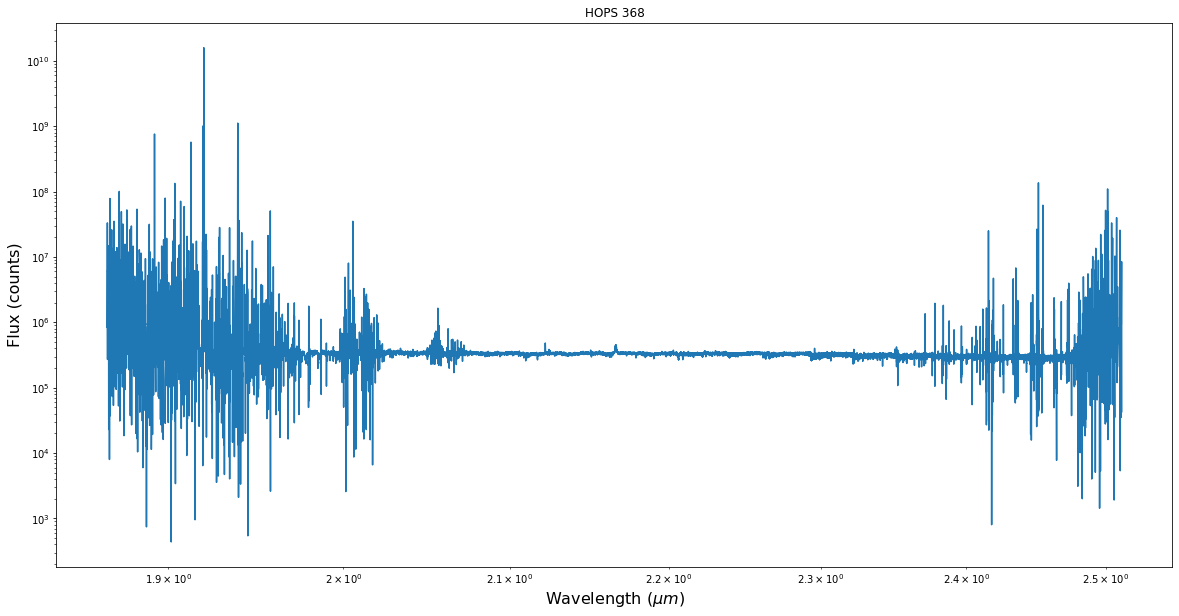

In [8]:
fig,ax = plt.subplots(figsize=(20,10))

# Plot wavelength vs flux for 6 HOPS sources
# there is definitely a way to do this with a loop but oh well
ax.plot(hops368_df['Wavelength'], hops368_df['Flux'])
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel('Wavelength ($\mu m$)',fontsize=16)
ax.set_ylabel('Flux (counts)',fontsize=16)
ax.set_title("HOPS 368")

plt.savefig("Merged_HOPS_Spectra_loglog" + '.png')
plt.show()

In [9]:
# test_df = hops368_df
# test_df.columns = ['Wavelength','Flux','S/N','Zeros']

# test_df = test_df.drop(columns='Zeros')
# test_df

In [10]:
# np.nanmin(hops368_data[2])
# # Will want to get rid of anything with S/N < 5
# for i in range(len(hops368_data)):
#     if hops368_data[2,i] < 5

In [11]:
# Wavelength (micron)
hops368_wavlen = hops368_data[0]
hops369_wavlen = hops369_data[0]
hops370s_wavlen = hops370s_data[0]
hops370_wavlen = hops370_data[0]
hops386_wavlen = hops386_data[0]
hops388_wavlen = hops388_data[0]

# Flux (Counts)
hops368_flux = hops368_data[1]
hops369_flux = hops369_data[1]
hops370s_flux = hops370s_data[1]
hops370_flux = hops370_data[1]
hops386_flux = hops386_data[1]
hops388_flux = hops388_data[1]

# S/N
hops368_sn = hops368_data[2]
hops369_sn = hops369_data[2]
hops370s_sn = hops370s_data[2]
hops370_sn = hops370_data[2]
hops386_sn = hops386_data[2]
hops388_sn = hops388_data[2]


In [12]:
# NIR Lines in micron
nir_dict = {
    "Fe-2.084": 2.084,
    "Si-2.092"	:	2.092,
    "Mg-2.106"	:	2.106,
    "Al-2.11"	:	2.11,
    "Ca-2.2035"	:	2.2035,
    "Fe-2.2037"	:	2.2037,
    "Sc-2.2052"	:	2.2052,
    "Na-2.2052"	:	2.2052,
    "Si-2.2063"	:	2.2063,
    "Sc-2.2065"	:	2.2065,
    "Si-2.2073"	:	2.2073,
    "Fe-2.2079"	:	2.2079,
    "Na-2.2083"	:	2.2083,
    "Ca-2.2113"	:	2.2113,
    "Ti-2.2218"	:	2.2218,
    "Ti-2.224"	:	2.224,
    "Fe-2.226"	:	2.226,
    "Ti-2.228"	:	2.228,
    "Ti-2.232"	:	2.232,
    "Ca-2.26573"	:	2.26573,
    "Fe-2.2742"	:	2.2742,
    "Mg-2.281"	:	2.281,
    "Ca-2.2825"	:	2.2825,
    "Fe-2.284"	:	2.284,
    "Ti-2.29"	:	2.29,
    "Ti-2.297"	:	2.297,
    "CO(2-0)-2.29353" :	2.29353,
    "CO(2-0)-2.32265"	:	2.32265,
    "CO(2-0)-2.34327" :	2.34327,
    "CO(2-0)-2.34531" :	2.34531,
    "CO(2-0)-2.3495" 	:	2.3495,
    "CO(2-0)-2.35167"	:	2.35167,
    "CO(2-0)-2.35246" :	2.35246,
    "CO(2-0)-2.38295" :	2.38295,
}

# Strings of the Nir lines
lines_str = list(nir_dict.keys())

# Wavelength values for each NIR line
lines_wav = list(nir_dict.values())

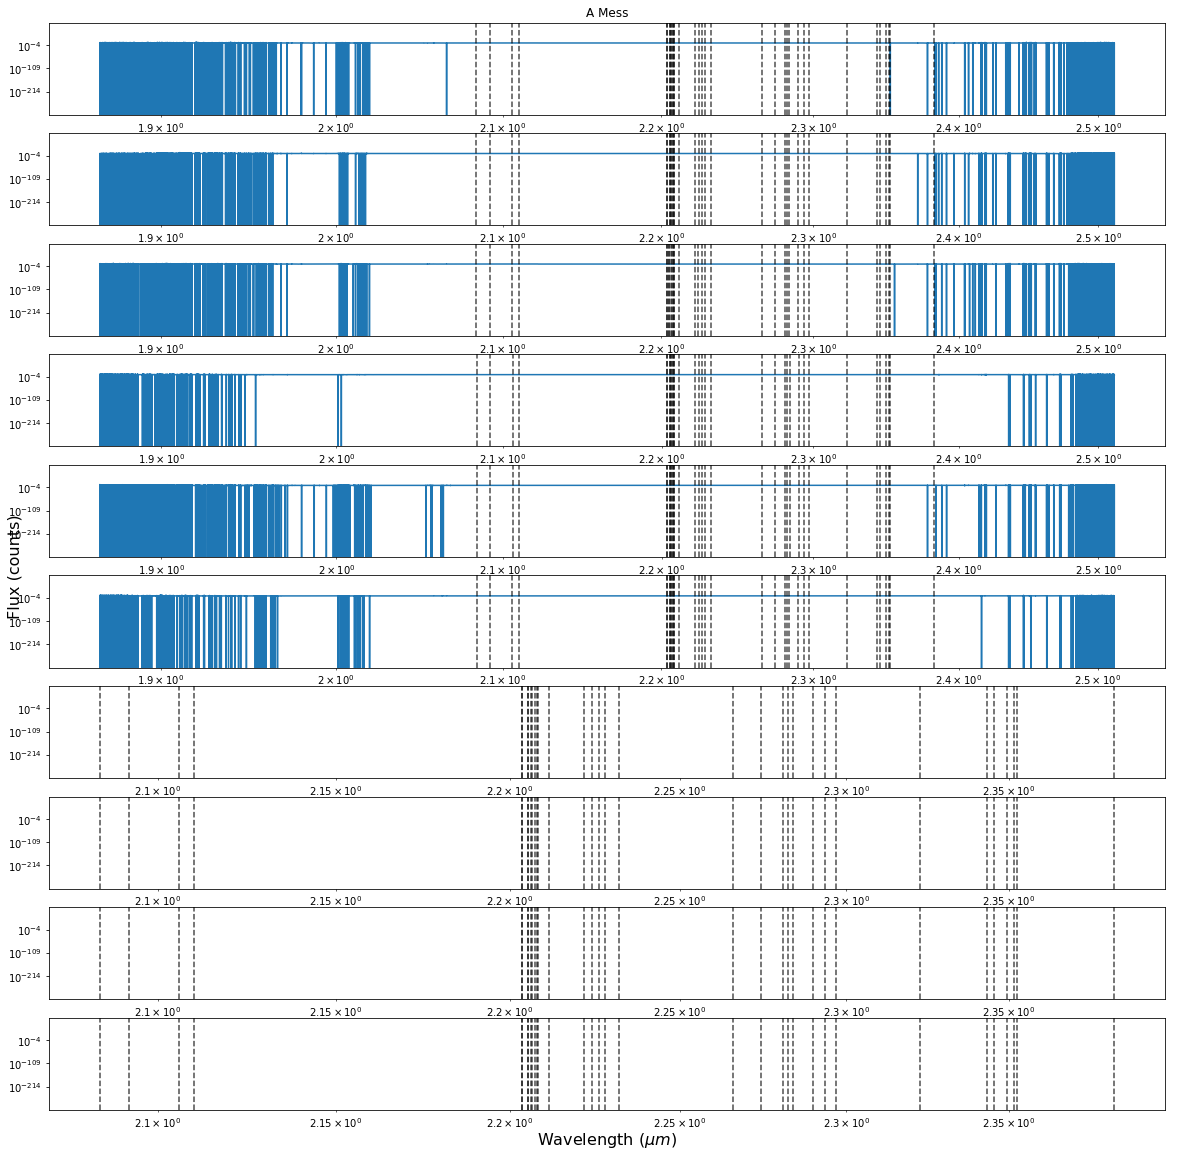

In [13]:
# n = len(merged_files)
# fig, ax = plt.subplots(n,1,sharey=True,figsize=(20,20))

# # Plot wavelength vs flux for 6 HOPS sources
# # there is definitely a way to do this with a loop but oh well
# ax[0].plot(hops368_wavlen, hops368_flux)
# ax[1].plot(hops369_wavlen,hops369_flux)
# ax[2].plot(hops370s_wavlen,hops370s_flux)
# ax[3].plot(hops370_wavlen,hops370_flux)
# ax[4].plot(hops386_wavlen,hops386_flux)
# ax[5].plot(hops388_wavlen,hops388_flux)

# # loop so I can just add all the NIR lines at once
# for i in range(n):
#     for ii in range(len(lines_wav)):
#         ax[i].axvline(x=lines_wav[ii],ls='dashed',color='black',alpha=0.7)
#     ax[i].set_xscale('log')
#     ax[i].set_yscale('log')

# # Labels
# # add an invisble 'frame' to go on top to make axis labels easy
# fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

# plt.xlabel('Wavelength ($\mu m$)',fontsize=16)
# plt.ylabel('Flux (counts)',fontsize=16)
# plt.title("A Mess")

# plt.savefig("Merged_HOPS_Spectra_loglog" + '.png')
# plt.show()

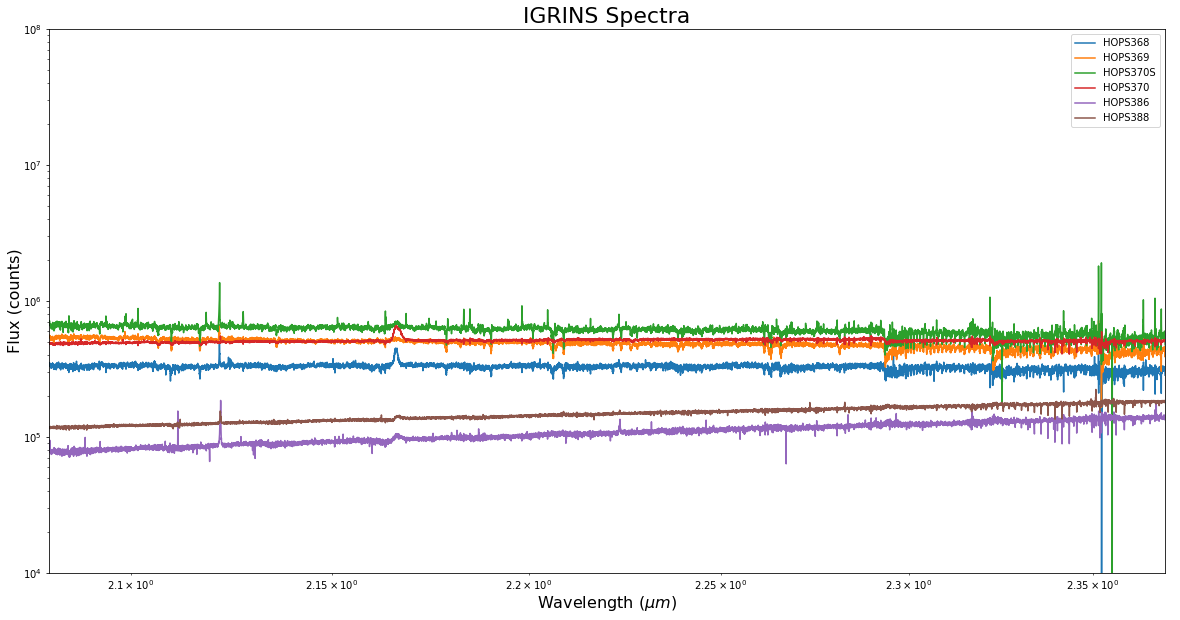

In [24]:
n = len(merged_files)
# fig, axs = plt.subplots(n,1,sharey=True,figsize=(20,10))
fig,ax = plt.subplots(figsize=(20,10))

# Plot wavelength vs flux for 6 HOPS sources
# there is definitely a way to do this with a loop but oh well
plt.plot(hops368_wavlen, hops368_flux,label="HOPS368")
plt.plot(hops369_wavlen,hops369_flux,label="HOPS369")
plt.plot(hops370s_wavlen,hops370s_flux,label="HOPS370S")
plt.plot(hops370_wavlen,hops370_flux,label="HOPS370")
plt.plot(hops386_wavlen,hops386_flux,label="HOPS386")
plt.plot(hops388_wavlen,hops388_flux,label="HOPS388")
plt.xlim(2.08,2.37)
plt.ylim(10e3,10e7)

# loop so I can just add all the NIR lines at once
# for i in range(n):
# for ii in range(len(lines_wav)):
#     ax.axvline(x=lines_wav[ii],ls='dashed',color='black',alpha=0.7)
ax.set_xscale('log')
ax.set_yscale('log')

plt.legend(loc='best')

# Labels
# add an invisble 'frame' to go on top to make axis labels easy
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.title("IGRINS Spectra", fontsize = 22)
plt.xlabel('Wavelength ($\mu m$)',fontsize=16)
plt.ylabel('Flux (counts)',fontsize=16)



# plt.savefig("Merged_HOPS_Spectra_loglog" + '.png')
plt.show()

In [15]:
# # This will be for looking at individual lines maybe?
# n = len(merged_files)
# # fig, axs = plt.subplots(n,1,sharey=True,figsize=(20,10))
# fig,ax = plt.subplots(figsize=(20,10))

# # Plot wavelength vs flux for 6 HOPS sources
# # there is definitely a way to do this with a loop but oh well
# plt.plot(hops368_wavlen, hops368_flux,label="HOPS368")
# plt.plot(hops369_wavlen,hops369_flux,label="HOPS369")
# plt.plot(hops370s_wavlen,hops370s_flux,label="HOPS370S")
# plt.plot(hops370_wavlen,hops370_flux,label="HOPS370")
# plt.plot(hops386_wavlen,hops386_flux,label="HOPS386")
# plt.plot(hops388_wavlen,hops388_flux,label="HOPS388")

# # Fe-2.084
# plt.xlim(nir_dict["Fe-2.084"]-1e-2,nir_dict["Fe-2.084"]+2e-2)

# # loop so I can just add all the NIR lines through the subplots
# # for i in range(n):
# for ii in range(len(lines_wav)):
#     ax.axvline(x=lines_wav[ii],ls='dashed',color='black',alpha=0.7)
#     ax.set_xscale('log')
#     ax.set_yscale('log')

# plt.legend(loc='best')

# # Labels
# # add an invisble 'frame' to go on top to make axis labels easy
# fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.title("IGRINS Spectra", fontsize = 22)
# plt.xlabel('Wavelength ($\mu m$)',fontsize=16)
# plt.ylabel('Flux (counts)',fontsize=16)


# # plt.savefig("Merged_HOPS_Spectra_loglog" + '.png')
# plt.show()

In [16]:
# from matplotlib.ticker import FormatStrFormatter
# # This will be for looking at individual lines maybe?
# n = len(merged_files)
# # fig, axs = plt.subplots(n,1,sharey=True,figsize=(20,10))

# for i in nir_dict:
#     fig,ax = plt.subplots(figsize=(20,10))
#     # Plot wavelength vs flux for 6 HOPS sources
#     # there is definitely a way to do this with a loop but oh well
#     plt.plot(hops368_wavlen, hops368_flux,label="HOPS368")
#     plt.plot(hops369_wavlen,hops369_flux,label="HOPS369")
#     plt.plot(hops370s_wavlen,hops370s_flux,label="HOPS370S")
#     plt.plot(hops370_wavlen,hops370_flux,label="HOPS370")
#     plt.plot(hops386_wavlen,hops386_flux,label="HOPS386")
#     plt.plot(hops388_wavlen,hops388_flux,label="HOPS388")
    
#     # "Si-2.092"
#     plt.xlim(nir_dict[i]-2e-2,nir_dict[i]+2e-2)

#     ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#     # loop so I can just add all the NIR lines through the subplots
#     # for i in range(n):
#     for ii in range(len(lines_wav)):
#         ax.axvline(x=lines_wav[ii],ls='dashed',color='black',alpha=0.5)

#     ax.set_xscale('log')
#     ax.set_yscale('log')

#     plt.legend(loc='best')

#     # Labels
#     # add an invisble 'frame' to go on top to make axis labels easy
#     fig.add_subplot(111, frameon=False)
#     plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
#     plt.title("IGRINS Spectra", fontsize = 22)
#     plt.xlabel('Wavelength ($\mu m$)',fontsize=16)
#     plt.ylabel('Flux (counts)',fontsize=16)
#     ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#     # plt.savefig("Merged_HOPS_Spectra_loglog" + '.png')
#     plt.show()